In [1]:
!pip install xgboost lightgbm shap catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [2]:
!mkdir -p /content/housing_regression/data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip
Saving archive (2).zip to archive (2).zip
Saving archive (3).zip to archive (3).zip
Saving archive.zip to archive.zip
Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques.zip


In [5]:
!ls -l /content

total 1828
-rw-r--r-- 1 root root 788976 Dec  9 07:32 'archive (1).zip'
-rw-r--r-- 1 root root 461423 Dec  9 07:32 'archive (2).zip'
-rw-r--r-- 1 root root 409382 Dec  9 07:32 'archive (3).zip'
-rw-r--r-- 1 root root 199644 Dec  9 07:32  archive.zip
drwxr-xr-x 3 root root   4096 Dec  9 07:31  housing_regression
drwxr-xr-x 1 root root   4096 Nov 20 14:30  sample_data


In [6]:
!unzip -l "archive.zip" | head
!unzip -l "archive (1).zip" | head
!unzip -l "archive (2).zip" | head
!unzip -l "archive (3).zip" | head

Archive:  archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   938020  2019-09-29 08:41   Bengaluru_House_Data.csv
---------                     -------
   938020                     1 file
Archive:  archive (1).zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  2381977  2019-10-01 12:15   kc_house_data.csv
---------                     -------
  2381977                     1 file
Archive:  archive (2).zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  2091239  2019-09-21 04:36   melb_data.csv
---------                     -------
  2091239                     1 file
Archive:  archive (3).zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  1423529  2019-09-22 01:36   housing.csv
---------                     -------
  1423529                     1 file


In [11]:
!ls -l /content/housing_regression/data

total 2020
-rw-r--r-- 1 root root 199644 Dec  9 07:32 bengaluru.zip
-rw-r--r-- 1 root root 409382 Dec  9 07:32 california.zip
-rw-r--r-- 1 root root 203809 Dec  9 07:32 house-prices-advanced-regression-techniques.zip
-rw-r--r-- 1 root root 788976 Dec  9 07:32 king_county.zip
-rw-r--r-- 1 root root 461423 Dec  9 07:32 melbourne.zip


In [16]:
!ls -l /content/housing_regression/data

total 2020
-rw-r--r-- 1 root root 199644 Dec  9 07:32 bengaluru.zip
-rw-r--r-- 1 root root 409382 Dec  9 07:32 california.zip
-rw-r--r-- 1 root root 203809 Dec  9 07:32 house-prices-advanced-regression-techniques.zip
-rw-r--r-- 1 root root 788976 Dec  9 07:32 king_county.zip
-rw-r--r-- 1 root root 461423 Dec  9 07:32 melbourne.zip


In [17]:
!unzip -o "/content/housing_regression/data/bengaluru.zip" -d "/content/housing_regression/data/bengaluru"
!unzip -o "/content/housing_regression/data/king_county.zip" -d "/content/housing_regression/data/king_county"
!unzip -o "/content/housing_regression/data/melbourne.zip" -d "/content/housing_regression/data/melbourne"
!unzip -o "/content/housing_regression/data/california.zip" -d "/content/housing_regression/data/california"
!unzip -o "/content/housing_regression/data/house-prices-advanced-regression-techniques.zip" -d "/content/housing_regression/data/ames"

Archive:  /content/housing_regression/data/bengaluru.zip
  inflating: /content/housing_regression/data/bengaluru/Bengaluru_House_Data.csv  
Archive:  /content/housing_regression/data/king_county.zip
  inflating: /content/housing_regression/data/king_county/kc_house_data.csv  
Archive:  /content/housing_regression/data/melbourne.zip
  inflating: /content/housing_regression/data/melbourne/melb_data.csv  
Archive:  /content/housing_regression/data/california.zip
  inflating: /content/housing_regression/data/california/housing.csv  
Archive:  /content/housing_regression/data/house-prices-advanced-regression-techniques.zip
  inflating: /content/housing_regression/data/ames/data_description.txt  
  inflating: /content/housing_regression/data/ames/sample_submission.csv  
  inflating: /content/housing_regression/data/ames/test.csv  
  inflating: /content/housing_regression/data/ames/train.csv  


In [18]:
import pandas as pd

df_ames = pd.read_csv("/content/housing_regression/data/ames/train.csv")
df_beng = pd.read_csv("/content/housing_regression/data/bengaluru/Bengaluru_House_Data.csv")
df_kc   = pd.read_csv("/content/housing_regression/data/king_county/kc_house_data.csv")
df_mel  = pd.read_csv("/content/housing_regression/data/melbourne/melb_data.csv")
df_ca   = pd.read_csv("/content/housing_regression/data/california/housing.csv")

df_ames.head(), df_beng.head(), df_kc.head(), df_mel.head(), df_ca.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explore_dataset(df, target_col, name="Dataset"):
    print(f"\n📌 {name} — Summary")
    print("Shape:", df.shape)
    print("\nMissing values (Top 10):")
    print(df.isna().sum().sort_values(ascending=False).head(10))

    # Target Distribution
    plt.figure(figsize=(6,4))
    sns.histplot(df[target_col], kde=True)
    plt.title(f"{name} — {target_col} Distribution")
    plt.show()

    # Correlation with target
    num_cols = df.select_dtypes(include=[np.number]).columns
    if target_col in num_cols:
        corr = df[num_cols].corr()[target_col].sort_values(ascending=False)
        print("\nTop positively correlated features:")
        print(corr.head(10))
        print("\nTop negatively correlated features:")
        print(corr.tail(10))


📌 Ames Housing — Summary
Shape: (1460, 81)

Missing values (Top 10):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


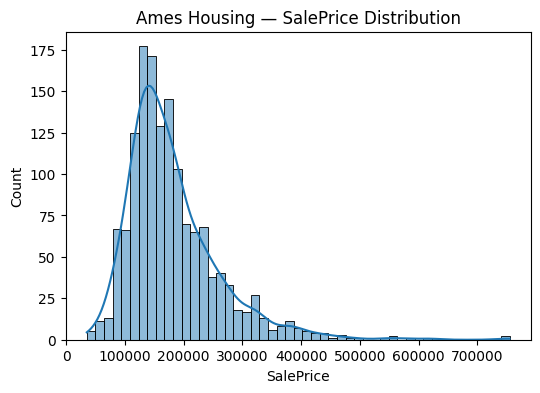


Top positively correlated features:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Top negatively correlated features:
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

📌 Bengaluru Housing — Summary
Shape: (13320, 9)

Missing values (Top 10):
society         5502
balcony          609
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64


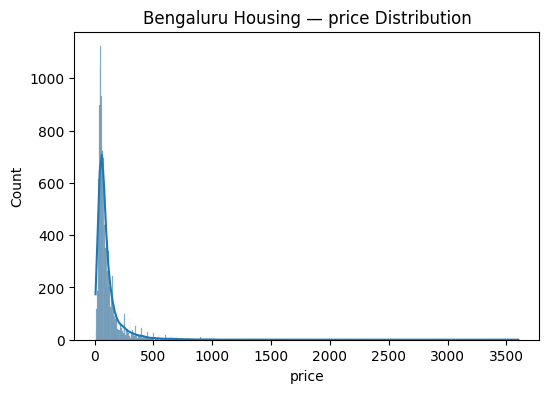


Top positively correlated features:
price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

Top negatively correlated features:
price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

📌 King County Housing — Summary
Shape: (21613, 21)

Missing values (Top 10):
sqft_above     2
date           0
price          0
bedrooms       0
id             0
bathrooms      0
sqft_living    0
floors         0
sqft_lot       0
waterfront     0
dtype: int64


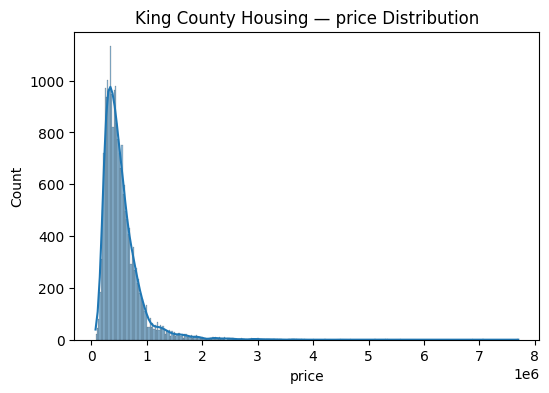


Top positively correlated features:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64

Top negatively correlated features:
waterfront      0.266369
floors          0.256794
yr_renovated    0.126434
sqft_lot        0.089661
sqft_lot15      0.082447
yr_built        0.054012
condition       0.036362
long            0.021626
id             -0.016762
zipcode        -0.053203
Name: price, dtype: float64

📌 Melbourne Housing — Summary
Shape: (13580, 21)

Missing values (Top 10):
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Car               62
Suburb             0
Price              0
Type               0
Rooms              0
Address            0
Distance           0
dtype: int64


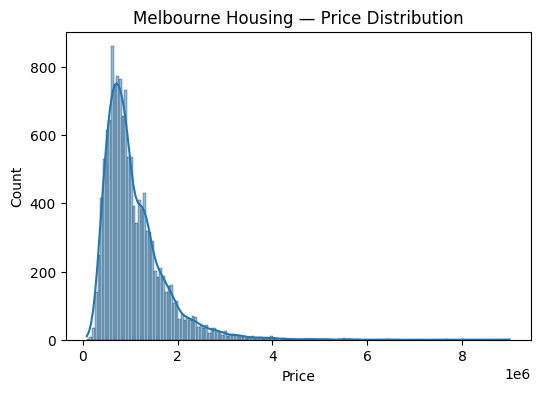


Top positively correlated features:
Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Name: Price, dtype: float64

Top negatively correlated features:
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

📌 California Housing — Summary
Shape: (20640, 10)

Missing values (Top 10):
total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


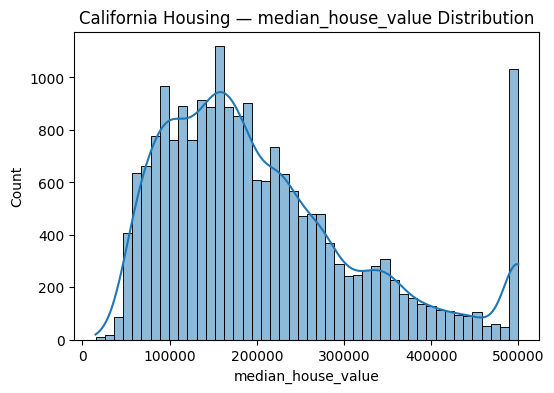


Top positively correlated features:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Top negatively correlated features:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [20]:
# Mapping dataset to target column name
target_map = {
    "Ames Housing": (df_ames, "SalePrice"),
    "Bengaluru Housing": (df_beng, "price"),
    "King County Housing": (df_kc, "price"),
    "Melbourne Housing": (df_mel, "Price"),
    "California Housing": (df_ca, "median_house_value"),
}

for name, (df, target) in target_map.items():
    explore_dataset(df, target, name)

In [21]:
import numpy as np
import pandas as pd

def clean_dataset(df, target_col):
    df = df.copy()
    # Drop rows where target is missing
    df = df[df[target_col].notna()].copy()

    # Drop obvious ID columns if present
    id_like_cols = ["Id", "id", "PID"]
    for col in id_like_cols:
        if col in df.columns:
            df = df.drop(columns=[col])

    return df

In [22]:
df_ames_clean = clean_dataset(df_ames, "SalePrice")
df_beng_clean = clean_dataset(df_beng, "price")
df_kc_clean   = clean_dataset(df_kc, "price")
df_mel_clean  = clean_dataset(df_mel, "Price")
df_ca_clean   = clean_dataset(df_ca, "median_house_value")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def train_test_split_xy(df, target_col, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def get_column_types(X):
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    return num_cols, cat_cols

def build_preprocessor(X):
    num_cols, cat_cols = get_column_types(X)

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ]
    )
    return preprocessor

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from sklearn.svm import SVR  # optional (slower on large data)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Lasso": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "RandomForest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=400,
        learning_rate=0.05,
        random_state=42
    ),
    # "SVR": SVR()  # you can add this later if you want
}

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


def evaluate_models_on_dataset(df, target_col, dataset_name):
    print(f"\n🚀 Evaluating on {dataset_name}")
    X_train, X_test, y_train, y_test = train_test_split_xy(df, target_col)
    preprocessor = build_preprocessor(X_train)

    rows = []

    for name, model in models.items():
        print(f"  → Training {name} ...")

        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        cv_scores = cross_val_score(
            pipe, X_train, y_train,
            cv=5,
            scoring="neg_mean_squared_error",
            n_jobs=-1
        )
        # Convert to RMSE
        cv_rmse_mean = np.sqrt(-cv_scores.mean())
        cv_rmse_std = np.sqrt(cv_scores.std())

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        rows.append({
            "dataset": dataset_name,
            "model": name,
            "cv_RMSE_mean": cv_rmse_mean,
            "cv_RMSE_std": cv_rmse_std,
            "test_RMSE": rmse,
            "test_MAE": mae,
            "test_R2": r2
        })

    results_df = pd.DataFrame(rows)
    return results_df.sort_values("test_RMSE")

In [29]:
all_results = []

all_results.append(
    evaluate_models_on_dataset(df_ames_clean, "SalePrice", "Ames Housing")
)
all_results.append(
    evaluate_models_on_dataset(df_beng_clean, "price", "Bengaluru Housing")
)
all_results.append(
    evaluate_models_on_dataset(df_kc_clean, "price", "King County Housing")
)
all_results.append(
    evaluate_models_on_dataset(df_mel_clean, "Price", "Melbourne Housing")
)
all_results.append(
    evaluate_models_on_dataset(df_ca_clean, "median_house_value", "California Housing")
)

results_all_df = pd.concat(all_results, ignore_index=True)
results_all_df


🚀 Evaluating on Ames Housing
  → Training LinearRegression ...
  → Training Ridge ...
  → Training Lasso ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118645836538.79903, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


  → Training ElasticNet ...
  → Training RandomForest ...
  → Training XGBoost ...
  → Training LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3203
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 178
[LightGBM] [Info] Start training from score 181441.541952


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🚀 Evaluating on Bengaluru Housing
  → Training LinearRegression ...
  → Training Ridge ...
  → Training Lasso ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382162.78691383824, tolerance: 23885.710684693273
  model = cd_fast.sparse_enet_coordinate_descent(


  → Training ElasticNet ...
  → Training RandomForest ...
  → Training XGBoost ...
  → Training LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 10656, number of used features: 303
[LightGBM] [Info] Start training from score 112.943326


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🚀 Evaluating on King County Housing
  → Training LinearRegression ...
  → Training Ridge ...
  → Training Lasso ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329446199423632.9, tolerance: 225891453177.81256
  model = cd_fast.sparse_enet_coordinate_descent(


  → Training ElasticNet ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288596994181940.2, tolerance: 225891453177.81256
  model = cd_fast.sparse_enet_coordinate_descent(


  → Training RandomForest ...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  → Training XGBoost ...
  → Training LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2859
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 278
[LightGBM] [Info] Start training from score 537768.047947


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🚀 Evaluating on Melbourne Housing
  → Training LinearRegression ...
  → Training Ridge ...
  → Training Lasso ...
  → Training ElasticNet ...
  → Training RandomForest ...
  → Training XGBoost ...
  → Training LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 10864, number of used features: 311
[LightGBM] [Info] Start training from score 1074964.928203


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🚀 Evaluating on California Housing
  → Training LinearRegression ...
  → Training Ridge ...
  → Training Lasso ...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


  → Training ElasticNet ...
  → Training RandomForest ...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  → Training XGBoost ...
  → Training LightGBM ...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207194.693738


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,dataset,model,cv_RMSE_mean,cv_RMSE_std,test_RMSE,test_MAE,test_R2
0,Ames Housing,XGBoost,28703.338565,16035.366349,25327.627287,15762.325195,0.916367
1,Ames Housing,Lasso,37026.773605,20948.662765,28313.704328,18001.679876,0.895485
2,Ames Housing,RandomForest,31091.195140,17461.258373,28398.152813,17360.377728,0.894860
3,Ames Housing,LightGBM,30070.291343,16196.983188,29361.676004,17223.843843,0.887605
4,Ames Housing,LinearRegression,37971.085148,20315.229538,29473.873055,18287.698623,0.886744
5,Ames Housing,ElasticNet,33999.169917,25246.000638,30402.252582,19189.905189,0.879497
6,Ames Housing,Ridge,33880.744774,25743.024151,30646.308031,19040.559638,0.877555
7,Bengaluru Housing,XGBoost,109.203328,42.601163,103.046762,41.670417,0.501251
8,Bengaluru Housing,LinearRegression,119.102821,39.334389,105.770198,41.596337,0.474540
9,Bengaluru Housing,Lasso,127.278004,61.787044,105.846438,38.195640,0.473782


In [30]:
results_all_df.sort_values(["dataset", "test_RMSE"]).groupby("dataset").head(3)

,dataset,model,cv_RMSE_mean,cv_RMSE_std,test_RMSE,test_MAE,test_R2
0,Ames Housing,XGBoost,28703.338565,16035.366349,25327.627287,15762.325195,0.916367
1,Ames Housing,Lasso,37026.773605,20948.662765,28313.704328,18001.679876,0.895485
2,Ames Housing,RandomForest,31091.195140,17461.258373,28398.152813,17360.377728,0.894860
7,Bengaluru Housing,XGBoost,109.203328,42.601163,103.046762,41.670417,0.501251
8,Bengaluru Housing,LinearRegression,119.102821,39.334389,105.770198,41.596337,0.474540
9,Bengaluru Housing,Lasso,127.278004,61.787044,105.846438,38.195640,0.473782
28,California Housing,LightGBM,46775.661709,7682.423080,45912.912453,30511.761365,0.839135
29,California Housing,XGBoost,46594.361810,6697.292480,46216.656238,30562.024359,0.836999
30,California Housing,RandomForest,49046.482566,8198.272469,48721.968199,31435.282816,0.818848
14,King County Housing,LightGBM,117947.488885,53271.924861,139594.009077,68539.489588,0.871101


In [32]:
from sklearn.model_selection import RandomizedSearchCV

df = df_ames_clean.copy()
target_col = "SalePrice"

X_train, X_test, y_train, y_test = train_test_split_xy(df, target_col)
preprocessor = build_preprocessor(X_train)

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [3, 4, 5, 6, 8],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

pipe_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_base)
])

search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search_xgb.fit(X_train, y_train)

print("Best params:", search_xgb.best_params_)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = search_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)           # ✅ manual RMSE
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__subsample': 0.8, 'model__n_estimators': 400, 'model__max_depth': 3, 'model__learning_rate': 0.03, 'model__colsample_bytree': 0.8}
Test RMSE: 25259.553756945115
Test R²: 0.9168164134025574


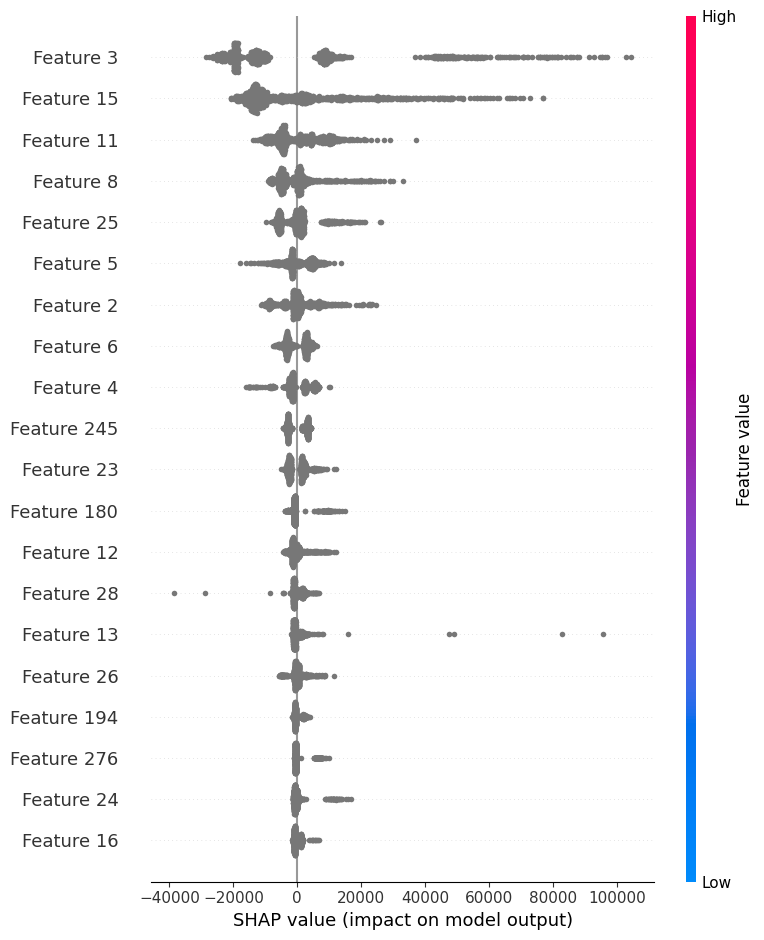

In [34]:
import shap

best_pipe = search_xgb.best_estimator_
best_model = best_pipe.named_steps["model"]
best_preprocessor = best_pipe.named_steps["preprocessor"]

# Get preprocessed feature matrix
X_train_raw = X_train.copy()
X_train_transformed = best_preprocessor.transform(X_train_raw)

# SHAP for tree model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed)

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # robust & no extra deps
from sklearn.metrics import mean_squared_error, r2_score

# Use the cleaned Ames DF you already have:
# df_ames_clean

deploy_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "YearBuilt",
    "LotArea",
    "Neighborhood",
]

target_col = "SalePrice"

df_deploy = df_ames_clean[deploy_features + [target_col]].dropna(subset=[target_col])

X = df_deploy[deploy_features]
y = df_deploy[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

rf_model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

pipe_ames = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_model)
])

pipe_ames.fit(X_train, y_train)

y_pred = pipe_ames.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Ames deploy model RMSE:", rmse)
print("Ames deploy model R²:", r2)

neighborhoods = sorted(X["Neighborhood"].dropna().unique().tolist())

Ames deploy model RMSE: 28325.741842595642
Ames deploy model R²: 0.895395889397563


In [39]:
!pip install gradio --quiet

import gradio as gr

In [40]:
def predict_price(
    overall_qual, gr_liv_area, garage_cars,
    total_bsmt_sf, full_bath, year_built,
    lot_area, neighborhood
):
    data = {
        "OverallQual": [overall_qual],
        "GrLivArea": [gr_liv_area],
        "GarageCars": [garage_cars],
        "TotalBsmtSF": [total_bsmt_sf],
        "FullBath": [full_bath],
        "YearBuilt": [year_built],
        "LotArea": [lot_area],
        "Neighborhood": [neighborhood],
    }

    df_input = pd.DataFrame(data)
    pred = pipe_ames.predict(df_input)[0]

    return f"Estimated Sale Price: ${pred:,.0f}"


with gr.Blocks() as demo:
    gr.Markdown("# 🏠 Ames House Price Prediction Dashboard")
    gr.Markdown(
        "This app uses a **Random Forest regression model** trained on the "
        "Ames Housing dataset. The full project includes comparison of multiple "
        "regression models across 5 different housing datasets."
    )

    with gr.Tab("🔮 Predict Price"):
        gr.Markdown("### Enter property details to get a price estimate")

        with gr.Row():
            overall_qual = gr.Slider(1, 10, value=5, step=1, label="Overall Quality (1–10)")
            gr_liv_area = gr.Number(value=1500, label="Above Ground Living Area (sq ft)")

        with gr.Row():
            garage_cars = gr.Slider(0, 4, value=2, step=1, label="Garage Capacity (cars)")
            total_bsmt_sf = gr.Number(value=800, label="Total Basement Area (sq ft)")

        with gr.Row():
            full_bath = gr.Slider(0, 4, value=2, step=1, label="Full Bathrooms")
            year_built = gr.Number(value=2000, label="Year Built")

        lot_area = gr.Number(value=8000, label="Lot Area (sq ft)")
        neighborhood = gr.Dropdown(choices=neighborhoods, value=neighborhoods[0], label="Neighborhood")

        predict_btn = gr.Button("Predict Price 💰")
        output_text = gr.Markdown()

        predict_btn.click(
            fn=predict_price,
            inputs=[
                overall_qual, gr_liv_area, garage_cars,
                total_bsmt_sf, full_bath, year_built,
                lot_area, neighborhood
            ],
            outputs=output_text
        )

    # Second tab: Show your regression results table from earlier
    with gr.Tab("📊 Model Benchmark (5 Datasets)"):
        gr.Markdown(
            "### Regression Model Comparison\n"
            "This table summarizes RMSE, MAE, and R² for multiple models "
            "across 5 housing datasets (Ames, Bengaluru, King County, Melbourne, California)."
        )

        try:
            # If results_all_df is in memory from earlier steps
            results_df_component = gr.Dataframe(
                value=results_all_df,
                label="Model Performance Summary",
                interactive=False
            )
        except NameError:
            gr.Markdown(
                "⚠️ `results_all_df` not found. "
                "Re-run the cell where you computed all_results / results_all_df."
            )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6da9b3ad8fb1607500.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
